# Contents
- Abstract
- Dataset
- Goal
- Importing Required libraries
- Data Cleaning and Data Processing
- Data Visualization and Encoding Data
- Prediction Models
       - Splitting the dataset into 80:20 ratio
       - Deploying the models
            - Linear Regression
            - RandomForest Regression
            - Lasso regression
- Comparing the accuracy of the models
- Conclusion

# Abstract
Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources. The data has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.

The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.

# Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : 
https://www.kaggle.com/sid321axn/gold-price-prediction-dataset

# Goal
The goal of this project is to analyse the data and predict the price of the gold.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [2]:
# loading the dataset
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


(array([111., 250., 459., 332., 137., 265., 414., 125., 115.,  82.]),
 array([ 676.530029 ,  896.1640378, 1115.7980466, 1335.4320554,
        1555.0660642, 1774.700073 , 1994.3340818, 2213.9680906,
        2433.6020994, 2653.2361082, 2872.870117 ]),
 <BarContainer object of 10 artists>)

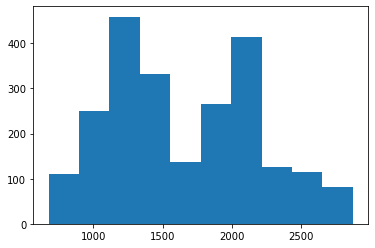

In [48]:
plt.hist(x="SPX",data=gold_data)

(array([ 55., 232., 155., 383., 738., 257.,  73., 209., 161.,  27.]),
 array([ 70.       ,  81.4589996,  92.9179992, 104.3769988, 115.8359984,
        127.294998 , 138.7539976, 150.2129972, 161.6719968, 173.1309964,
        184.589996 ]),
 <BarContainer object of 10 artists>)

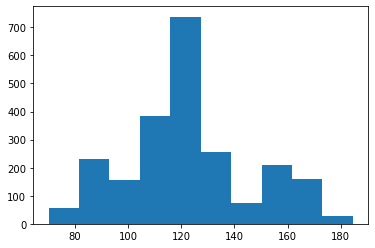

In [49]:
plt.hist(x="GLD",data=gold_data)

(array([ 691.,  160., 1186.,   83.,   13.,   26.,   46.,   33.,   28.,
          24.]),
 array([  7.96     ,  18.9120003,  29.8640006,  40.8160009,  51.7680012,
         62.7200015,  73.6720018,  84.6240021,  95.5760024, 106.5280027,
        117.480003 ]),
 <BarContainer object of 10 artists>)

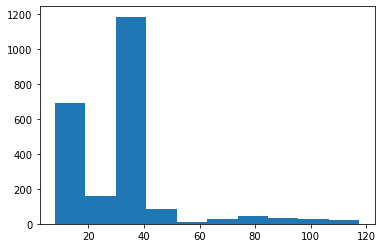

In [51]:
plt.hist(x="USO",data=gold_data)

(array([116., 826., 665., 132., 126., 209., 139.,  50.,  21.,   6.]),
 array([ 8.85     , 12.6909998, 16.5319996, 20.3729994, 24.2139992,
        28.054999 , 31.8959988, 35.7369986, 39.5779984, 43.4189982,
        47.259998 ]),
 <BarContainer object of 10 artists>)

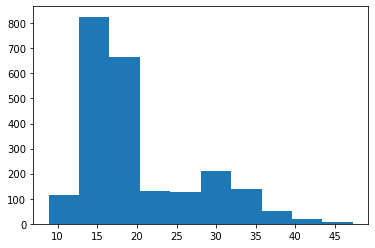

In [52]:
plt.hist(x="SLV",data=gold_data)

(array([229., 317., 137., 210., 388., 474., 249., 165.,  43.,  78.]),
 array([1.039047 , 1.0950221, 1.1509972, 1.2069723, 1.2629474, 1.3189225,
        1.3748976, 1.4308727, 1.4868478, 1.5428229, 1.598798 ]),
 <BarContainer object of 10 artists>)

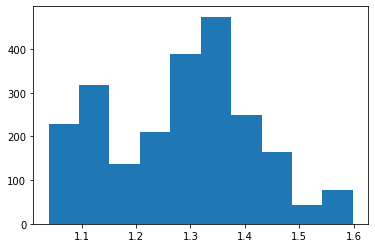

In [53]:
plt.hist(x="EUR/USD",data=gold_data)

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

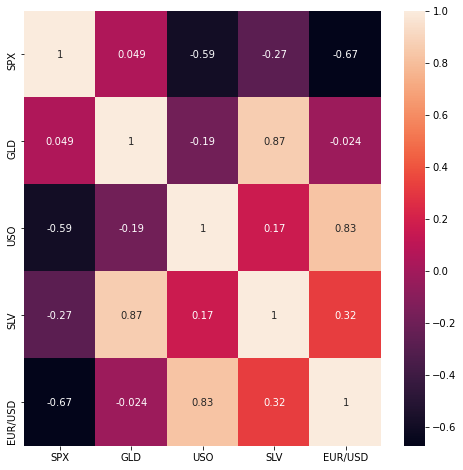

In [10]:
# constructing a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation,annot=True)

C:\Users\deept\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

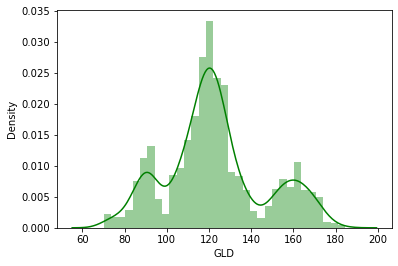

In [11]:
sns.distplot(gold_data['GLD'],color='green')

In [12]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Random forest regressor
- A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [17]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [18]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891022229661693


In [19]:
Y_test = list(Y_test)

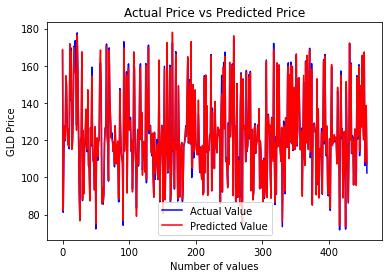

In [20]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

linear regression
- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [28]:
regressor= LinearRegression()  
regressor.fit(X_train, Y_train)  

LinearRegression()

In [29]:
y_pred= regressor.predict(X_test)

In [31]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))  

Train Score:  0.8850695972446934
Test Score:  0.8657886565869237


Lasso regression
- Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

In [41]:
model = Lasso(alpha=1.0)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print('Test Score: ', regressor.score(X_test, Y_test))  

Test Score:  0.8657886565869237


Out of the above three models, random forest regression has the highest accuracy.
Hence, we choose the model with highest accuracy.

In [54]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1